In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy


In [2]:
dataset = pd.read_csv('../../Phase1/DataSets/apdra_dataset.csv')

x = pd.DataFrame(dataset.iloc[:, 0:3].values)
y = dataset.iloc[:, 3].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

x_inp = [];
y_inp = [];


x_inp.extend(numpy.array(x_train))

y_inp.extend(numpy.array(y_train))

DATA_SIZE = 500000;

decision_tree_w = 10;
random_forest_w = 10;
knn_w = 10;
xg_boost_w = 10;

total_w = decision_tree_w + random_forest_w + knn_w + xg_boost_w;

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

def genDataSet (size):
    s = int(size);
    rand_rad = randomSample(8, 10, s)
    rand_height = randomSample(13, 15, s)
    rand_freq = randomSample(3, 6, s)

    rand_x = []
    for i in range(0, s):
        rand_x.append([rand_height[i], rand_rad[i], rand_freq[i]])
    return rand_x
    
    


In [3]:
len(x_inp)

29136

In [4]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor()
DTReg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (decision_tree_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(DTReg.predict(x_gen)))

In [5]:
len(x_inp)

154136

In [6]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
 
knn.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (knn_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(knn.predict(x_gen)))


In [7]:
len(x_inp)

279136

In [8]:
# Random Forest


from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RFreg.fit(x_train,y_train)

x_gen = genDataSet(DATA_SIZE * (random_forest_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(RFreg.predict(x_gen)))


In [9]:
len(x_inp)

404136

In [10]:
# XG Boost


import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=100, objective='reg:linear', seed = 123)

# Train the model with train data sets
xgb_reg.fit(x_train, y_train)

x_gen = genDataSet(DATA_SIZE * (xg_boost_w/total_w))

x_inp.extend(numpy.array(x_gen))
y_inp.extend(numpy.array(xgb_reg.predict(numpy.array(x_gen))))


C:\Users\iayus\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\iayus\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
len(x_inp)

529136

In [12]:
# KBNN

import keras
from keras.models import Sequential
from keras.layers import Dense

# Artificial NN

classifier = Sequential()

# Input Layer
classifier.add(Dense(units = 6, activation = 'relu', input_dim = 3))

# 1st Hidden Layer
classifier.add(Dense(units = 8, activation = 'relu'))

# 2nd Hidden Layer
classifier.add(Dense(units = 3, activation = 'relu'))

# Output Layer
classifier.add(Dense(units = 1, activation = 'linear'))

In [13]:
x_inp = numpy.asarray(x_inp).astype(numpy.float32)
y_inp = numpy.asarray(y_inp).astype(numpy.float32)

# Training

classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

history=classifier.fit(x_inp, y_inp, batch_size = 10, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
52914/52914 [==============================] - 68s 1ms/step - loss: 19.0565 - accuracy: 0.0000e+00 - val_loss: 16.8842 - val_accuracy: 0.0000e+00
Epoch 2/100
52914/52914 [==============================] - 63s 1ms/step - loss: 6.6759 - accuracy: 0.0000e+00 - val_loss: 2.7020 - val_accuracy: 0.0000e+00
Epoch 3/100
52914/52914 [==============================] - 63s 1ms/step - loss: 2.8621 - accuracy: 0.0000e+00 - val_loss: 2.5690 - val_accuracy: 0.0000e+00
Epoch 4/100
52914/52914 [==============================] - 64s 1ms/step - loss: 2.7484 - accuracy: 0.0000e+00 - val_loss: 2.4813 - val_accuracy: 0.0000e+00
Epoch 5/100
52914/52914 [==============================] - 63s 1ms/step - loss: 2.6946 - accuracy: 0.0000e+00 - val_loss: 2.6163 - val_accuracy: 0.0000e+00
Epoch 6/100
52914/52914 [==============================] - 63s 1ms/step - loss: 2.6063 - accuracy: 0.0000e+00 - val_loss: 3.2122 - val_accuracy: 0.0000e+00
Epoch 7/100
52914/52914 [==============================] - 62s

52914/52914 [==============================] - 72s 1ms/step - loss: 1.5017 - accuracy: 0.0000e+00 - val_loss: 1.4772 - val_accuracy: 0.0000e+00
Epoch 54/100
52914/52914 [==============================] - 73s 1ms/step - loss: 1.4789 - accuracy: 0.0000e+00 - val_loss: 1.4445 - val_accuracy: 0.0000e+00
Epoch 55/100
52914/52914 [==============================] - 73s 1ms/step - loss: 1.4785 - accuracy: 0.0000e+00 - val_loss: 1.9350 - val_accuracy: 0.0000e+00
Epoch 56/100
52914/52914 [==============================] - 73s 1ms/step - loss: 1.4914 - accuracy: 0.0000e+00 - val_loss: 1.6162 - val_accuracy: 0.0000e+00
Epoch 57/100
52914/52914 [==============================] - 72s 1ms/step - loss: 1.4708 - accuracy: 0.0000e+00 - val_loss: 1.7402 - val_accuracy: 0.0000e+00
Epoch 58/100
52914/52914 [==============================] - 72s 1ms/step - loss: 1.4836 - accuracy: 0.0000e+00 - val_loss: 1.4172 - val_accuracy: 0.0000e+00
Epoch 59/100
52914/52914 [==============================] - 70s 1ms/ste

In [14]:
y_inp

array([ -3.711126 , -17.659098 ,  -2.8872786, ...,  -3.0222614,
        -3.9809656,  -8.772742 ], dtype=float32)

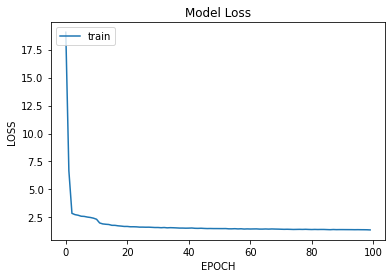

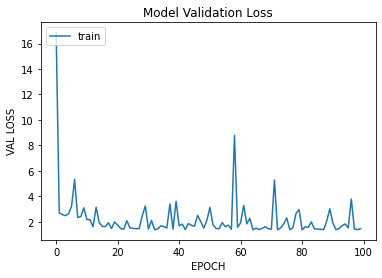

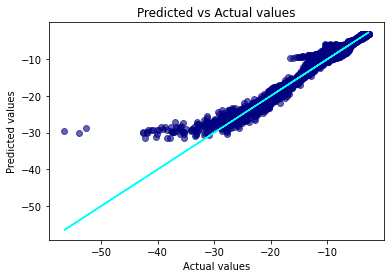

In [15]:
# Prediction

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = classifier.predict(x_test)
mean_squared_error(y_test,y_pred)
r2_score(y_test, y_pred)

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('VAL LOSS')
plt.xlabel('EPOCH')
plt.legend(['train'], loc='upper left')
plt.show()

def generatePredictionPlot(y_pred, y_test):
    plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
    plt.plot(y_test, y_test,color='cyan')
    plt.title('Predicted vs Actual values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    
generatePredictionPlot(y_pred, y_test)

In [16]:
mean_squared_error(y_test,y_pred)

1.4525970738820753

In [17]:
r2_score(y_test, y_pred)

0.9619917480608782